# 1. Текстовое описание выбранного набора данных

Этот набор данных содержит информацию о 1000 самых популярных видео на YouTube по состоянию на 27 января 2025 года.


Рейтинг : рейтинг видеороликов.
Видео : Описание видеороликов.
Просмотры видео : Количество просмотров видео ограничено.
Лайки : Количество лайков к видео ограничено.
Антипатии : Никаких антипатий к видео.
Категория : Категория видеороликов.
Опубликовано : Год публикации видео.

# 2. Основные характеристики датасета.

In [27]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Загрузим файлы датасета в помощью библиотеки Pandas.

In [28]:
df = pd.read_csv("Most popular 1000 Youtube videos.csv", encoding='UTF-8-SIG') # Загружаем датасет из CSV файла
df.head() # Первые 5 строк датасета

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [29]:
# Размер датасета - 1000 строк (записей о видео) и 7 столбцов.
df.shape

(1000, 7)

In [30]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [51]:
# Список колонок
df.columns

Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')

In [31]:
# Выводим типы данных каждой колонки.
df.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

In [32]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

rank - 0
Video - 0
Video views - 0
Likes - 0
Dislikes - 473
Category - 18
published - 0


In [52]:
# Выводим основные статистические характеристики числовых колонок.
# Включает в себя количество, среднее значение, стандартное отклонение, минимум, максимум, квартили.
# Помогает получить общее представление о распределении данных.
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


In [33]:
df_clean = df.copy() # Создаем копию датасета для дальнейшей обработки, чтобы не изменять исходный датасет.

In [34]:
cols_to_convert = ['Video views', 'Likes', 'Dislikes']
# Определяем список колонок, в которых нужно преобразовать тип данных.
# В данном случае, это колонки с количеством просмотров, лайков и дизлайков.

In [35]:
# Преобразуем тип данных в указанных колонках.
for col in cols_to_convert:
   # Удаляем запятые из строк, чтобы можно было преобразовать их в числа.
    df_clean[col] = df_clean[col].str.replace(',', '', regex=False)
    # Преобразуем строки в числа. Если преобразование не удается, устанавливается значение NaN.
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Проверяем наличие пропущенных значений после преобразования.
# Могли появиться из-за некорректных данных в исходном датасете.
print('Missing values after conversion:\n', df_clean[cols_to_convert].isnull().sum())


Missing values after conversion:
 Video views      0
Likes            0
Dislikes       473
dtype: int64


In [36]:
# Выводим общую информацию о датасете, включая типы данных, количество строк и столбцов,
# количество ненулевых значений в каждой колонке и объем занимаемой памяти.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   Video        1000 non-null   object 
 2   Video views  1000 non-null   int64  
 3   Likes        1000 non-null   int64  
 4   Dislikes     527 non-null    float64
 5   Category     982 non-null    object 
 6   published    1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


# 3. Визуальное исследование датасета

Basic statistics:
              rank   Video views         Likes       Dislikes    published
count  1000.000000  1.000000e+03  1.000000e+03     527.000000  1000.000000
mean    500.500000  2.453435e+07  3.685451e+05    2322.324478  2019.100000
std     288.819436  2.512570e+08  1.629418e+06    9653.170360     5.384328
min       1.000000  4.493900e+04  4.330000e+02       0.000000  2005.000000
25%     250.750000  9.815690e+05  9.427250e+03     200.000000  2017.000000
50%     500.500000  2.341652e+06  3.026200e+04     477.000000  2021.000000
75%     750.250000  1.162638e+07  1.649858e+05    1469.000000  2024.000000
max    1000.000000  6.547981e+09  4.442854e+07  178042.000000  2025.000000


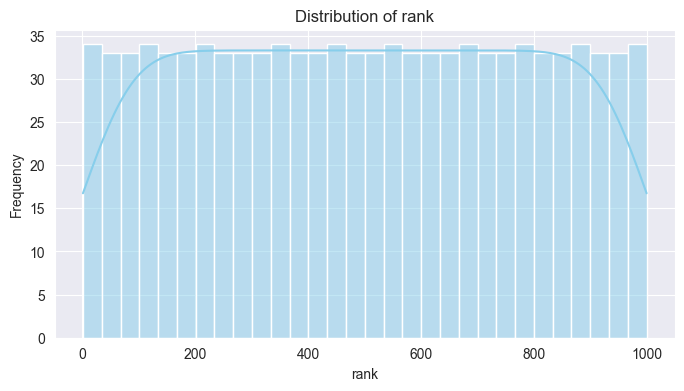

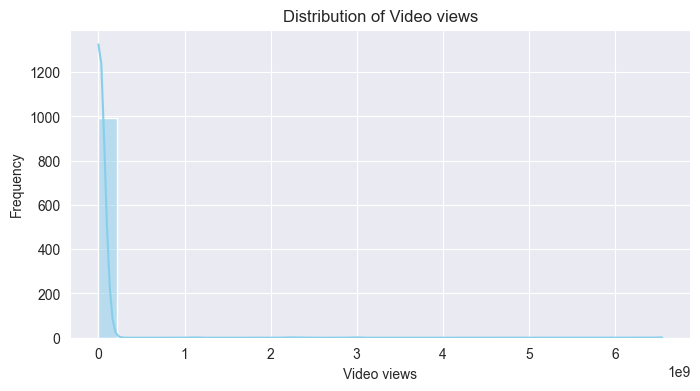

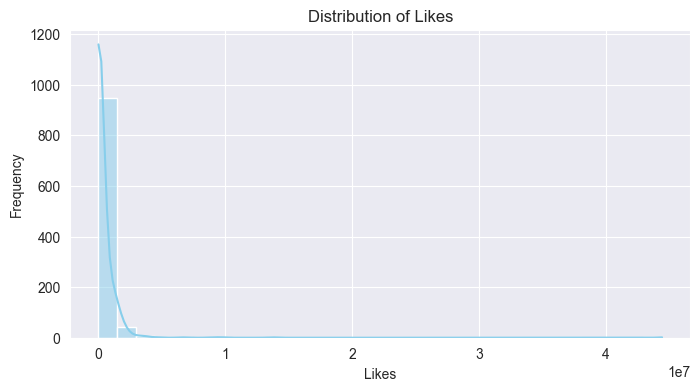

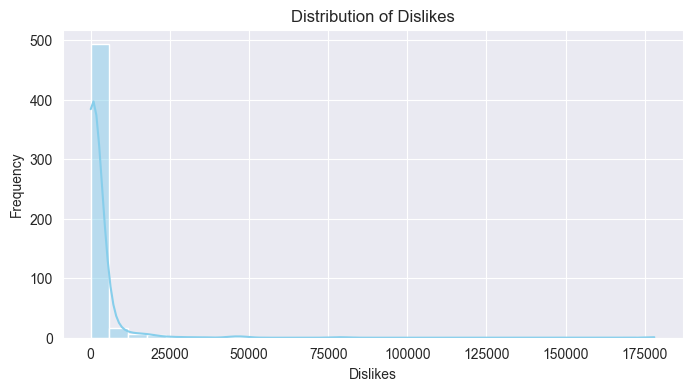

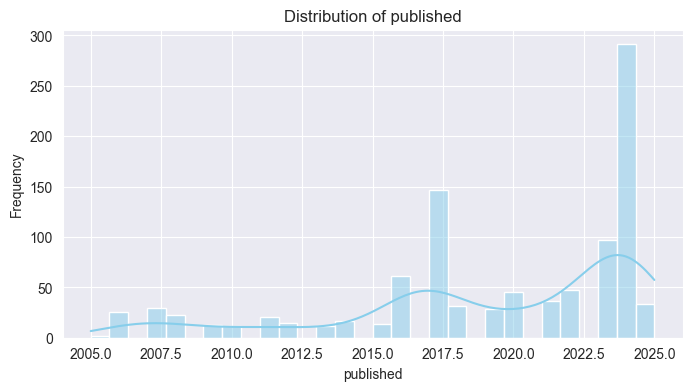

In [53]:
print('Basic statistics:')
print(df_clean.describe())

# Distribution of numerical columns using histograms
numeric_cols = ['rank', 'Video views', 'Likes', 'Dislikes', 'published']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

published (Год публикации): показывает тренд увеличения количества популярных видео с течением времени (если YouTube растет). Видны пики в определенные годы, что может указывать на изменения в алгоритмах YouTube или трендах в контенте.

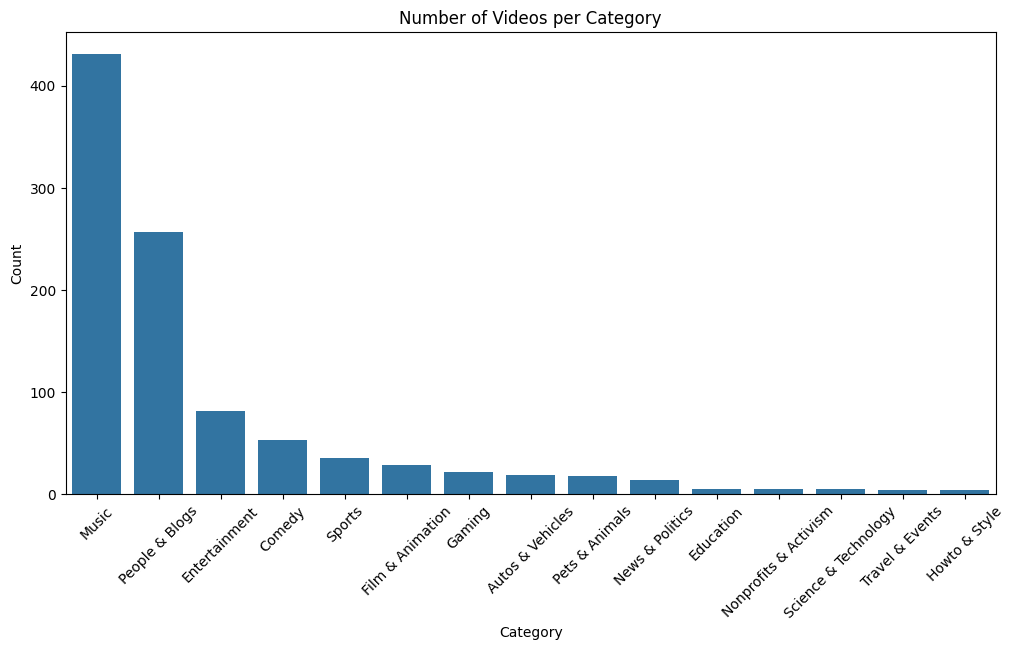

In [21]:
# Count Plot for Categories (Pie Chart alternative for categorical ratings)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='Category', order=df_clean['Category'].value_counts().index)
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

По данному графику видим, какие категории видео являются наиболее популярными (имеют больше всего видео в наборе данных). Это видео жанров "музыка", "блоги", и т.д.

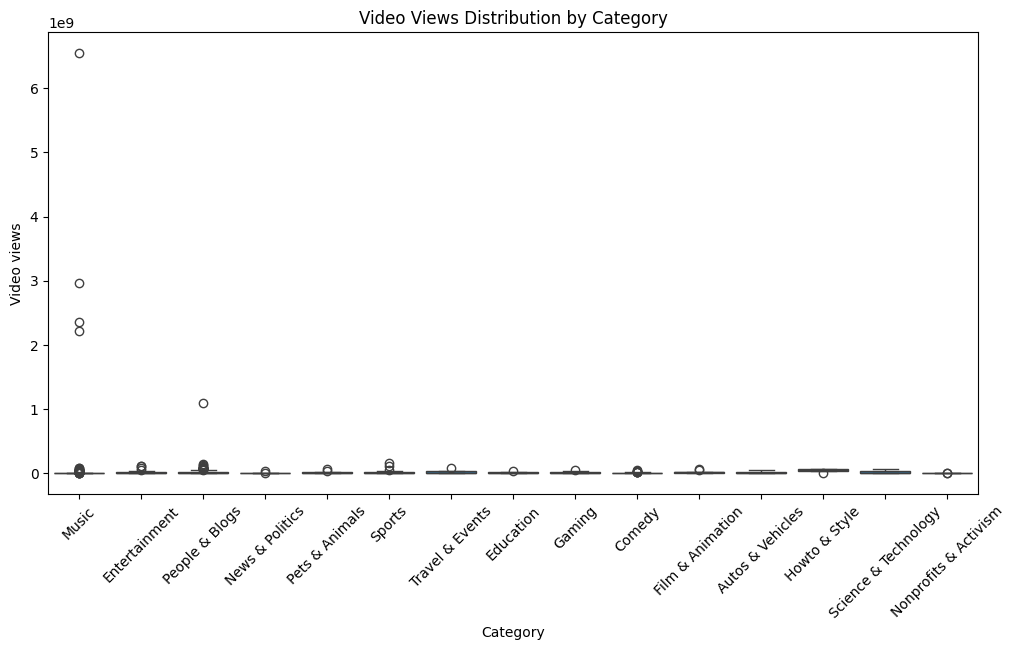

In [23]:
# Box Plot for Video Views across Categories to visualize distribution and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Category', y='Video views')
plt.title('Video Views Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Video views')
plt.xticks(rotation=45)
plt.show()

Видим, что категория “Music” имеет самый высокий “ящик” и много выбросов сверху. Это может означать следующее:
В среднем музыкальные видео имеют больше просмотров, чем видео в других категориях.
Разброс количества просмотров среди музыкальных видео очень велик (некоторые музыкальные видео становятся невероятно популярными, а другие - нет).
Есть несколько музыкальных видео с аномально большим количеством просмотров (выбросы).
То же самое можем сказать про категорию "блоги".

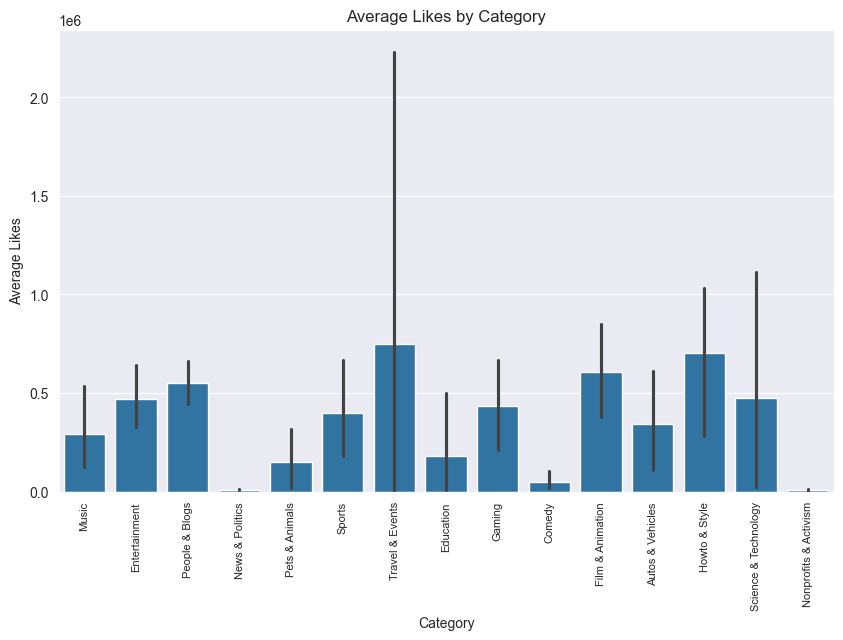

In [56]:
df2 = df.copy()

df2['Likes'] = df2['Likes'].str.replace(',', '', regex=False) # Убираем запятые
df2['Likes'] = pd.to_numeric(df2['Likes'], errors='coerce') # Преобразуем в число

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Likes', data=df2)
plt.title('Average Likes by Category')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Category')
plt.ylabel('Average Likes')  # Добавьте подпись оси Y
plt.show()

Столбчатая диаграмма показывает среднее количество лайков для видео в каждой категории. Видим, что лидируют "путешествия".

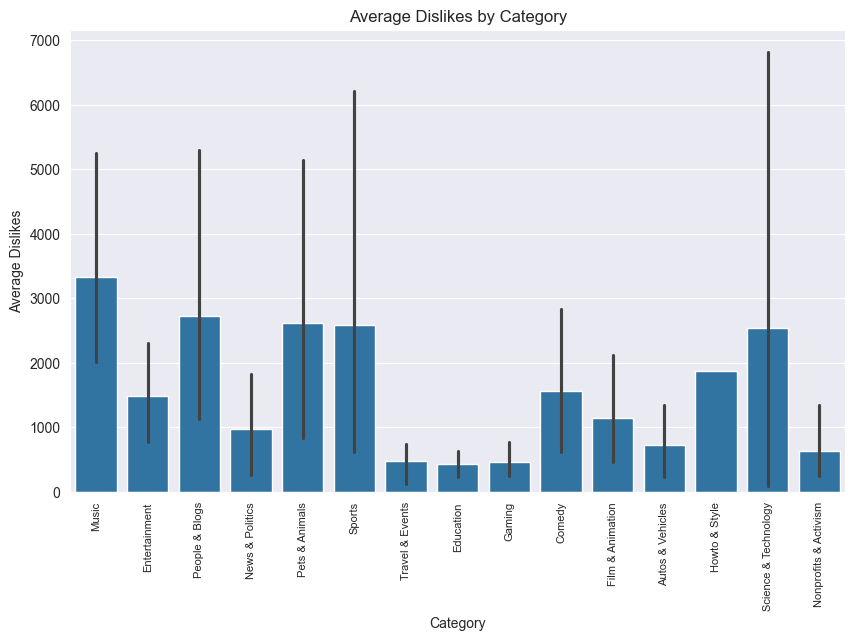

In [57]:
df2 = df.copy()

# Преобразование типа данных колонки 'Dislikes' в числовой (если необходимо)
# Это необходимо, если 'Dislikes' имеет тип object (строка)
df2['Dislikes'] = df2['Dislikes'].str.replace(',', '', regex=False) # Убираем запятые
df2['Dislikes'] = pd.to_numeric(df2['Dislikes'], errors='coerce') # Преобразуем в число

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Dislikes', data=df2)
plt.title('Average Dislikes by Category')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Category')
plt.ylabel('Average Dislikes')  # Добавьте подпись оси Y
plt.show()

In [ ]:
Видим, что больше всего дизлайки ставят спортивным видео, музыкальным и "науке и технологиям".
Интересно, что спортивные видео вызывают больше всего эмоций как по лайкам, так по дизлайкам.

# 4. Информация о корреляции признаков.

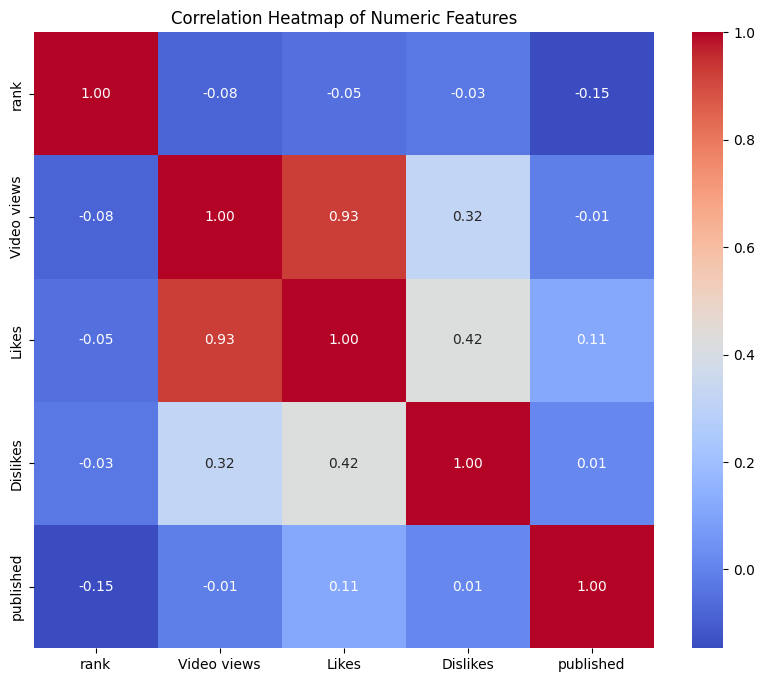

In [44]:
# Correlation Heatmap
# Use only the numeric columns present in the DataFrame
numeric_df = df_clean.select_dtypes(include=[np.number])

# Check if there are at least 4 numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')